In [1]:
# Source: https://colab.research.google.com/drive/12YBDQFYXN8VruxKTfzDpbPsYFAEQceQP#scrollTo=4XYFwWhU8yEt

import matplotlib.pyplot as plt
from IPython.display import Image

def show_images(images: list) -> None:
    n: int = len(images)
    f = plt.figure()
    for i in range(n):        
        f.add_subplot(1, n, i + 1)
        plt.imshow(images[i], cmap='gray')
    plt.show(block=True)
    
def show_image(image) -> None:
    plt.imshow(image, cmap='gray')
    plt.show(block=True)
    
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num=25
    for i in range(0, num):
        ax=plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap='binary')
        title="label=" + str(labels[idx])
        if len(prediction) > 0:
            title += ",predict=" + str(prediction[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);
        ax.set_yticks([]);
        idx += 1
    plt.show()
    
def show_train_history(train_history):
    fig=plt.gcf()
    fig.set_size_inches(16, 6)
    plt.subplot(121)
    print(train_history.history.keys())
    
    if "accuracy" in train_history.history.keys():
        plt.plot(train_history.history["accuracy"])
    
    if "val_accuracy" in train_history.history.keys():
        plt.plot(train_history.history["val_accuracy"])
        
    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="upper left")
    plt.subplot(122)
    
    if "loss" in train_history.history.keys():
        plt.plot(train_history.history["loss"])
        
    if "val_loss" in train_history.history.keys():
        plt.plot(train_history.history["val_loss"])
        
    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

2024-02-05 09:34:22.605069: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-05 09:34:22.623923: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-05 09:34:22.623946: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-05 09:34:22.624557: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-05 09:34:22.628254: I tensorflow/core/platform/cpu_feature_guar

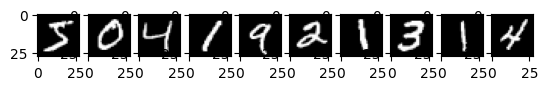

number of training images: 60000
number of test images: 10000


In [2]:
from tensorflow import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# print out first 10 images in our training data
imgplot = show_images(x_train[0:10])

# check the size of our dataset
print("number of training images:",x_train.shape[0])
print("number of test images:",y_test.shape[0])

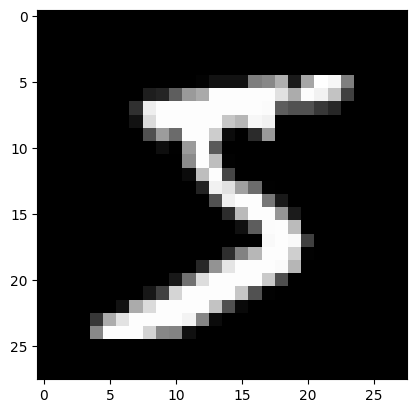

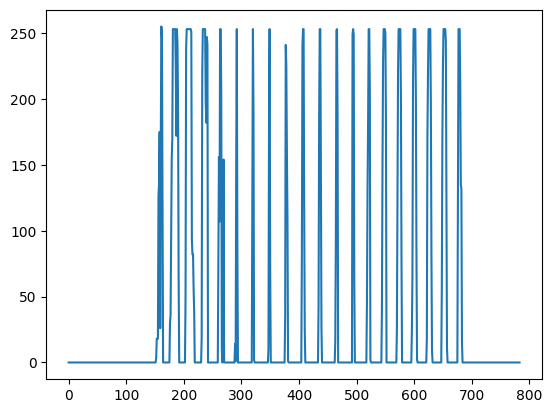

In [3]:
sample = x_train[0]

# origin image
show_image(sample)

# input of MLP, a images were transfer into a vector
plt.plot(sample.reshape(28 * 28))

In [4]:
# update all the training, testing dataset.
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize them into range [0, 1]
x_train /= 255
x_test /= 255

In [5]:
from tensorflow.keras import layers

num_classes = 10
hidden_dim = 32
# create a Sequential model
model = keras.Sequential(
    [
        # input layer. input data with size 28*28 and output size 256
        # 256 means you set up your modul with 256 NN in this layer. This value is up to you.
        layers.Dense(hidden_dim, input_shape=(28*28,), activation='relu'), 
        
        # hidden layer. input data with size 256, which were same to output of input layer.
        # output size 256, we set up 256 NN again in this hidden layer.
        # no need to give input size here because keras already know.
        layers.Dense(hidden_dim, activation='relu'),
        
        # output layer. the number of output should be your number of classification
        layers.Dense(num_classes, activation='softmax')
    ]
)

# print out model structure
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 26506 (103.54 KB)
Trainable params: 26506 (103.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-02-05 09:34:23.746863: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-05 09:34:23.765292: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-05 09:34:23.765375: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [6]:
optimizer = 'adam' # default adam hparams
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

batch_size = 32
epochs = 10
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    validation_split=0.2)

Epoch 1/10


2024-02-05 09:34:24.289191: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f2583b9c0c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-05 09:34:24.289204: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2024-02-05 09:34:24.291831: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-05 09:34:24.298920: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1707143664.332806 3839375 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1500/1500 [==============================] - 4s 3ms/step - loss: 0.3808 - accuracy: 0.8907 - val_loss: 0.2163 - val_accuracy: 0.9367
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1970 - accuracy: 0.9421 - val_loss: 0.1771 - val_accuracy: 0.9489
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1560 - accuracy: 0.9544 - val_loss: 0.1546 - val_accuracy: 0.9542
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1302 - accuracy: 0.9613 - val_loss: 0.1420 - val_accuracy: 0.9577
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1126 - accuracy: 0.9665 - val_loss: 0.1298 - val_accuracy: 0.9629
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0985 - accuracy: 0.9704 - val_loss: 0.1267 - val_accuracy: 0.9642
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0875 - accuracy: 0.9737 - val_loss: 0.1401 - val_accuracy: 0.9604
Epo

In [7]:
scores, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores)
print('Test accuracy:', acc)

Test loss: 0.10985245555639267
Test accuracy: 0.9674000144004822


313/313 [==============================] - 0s 390us/step


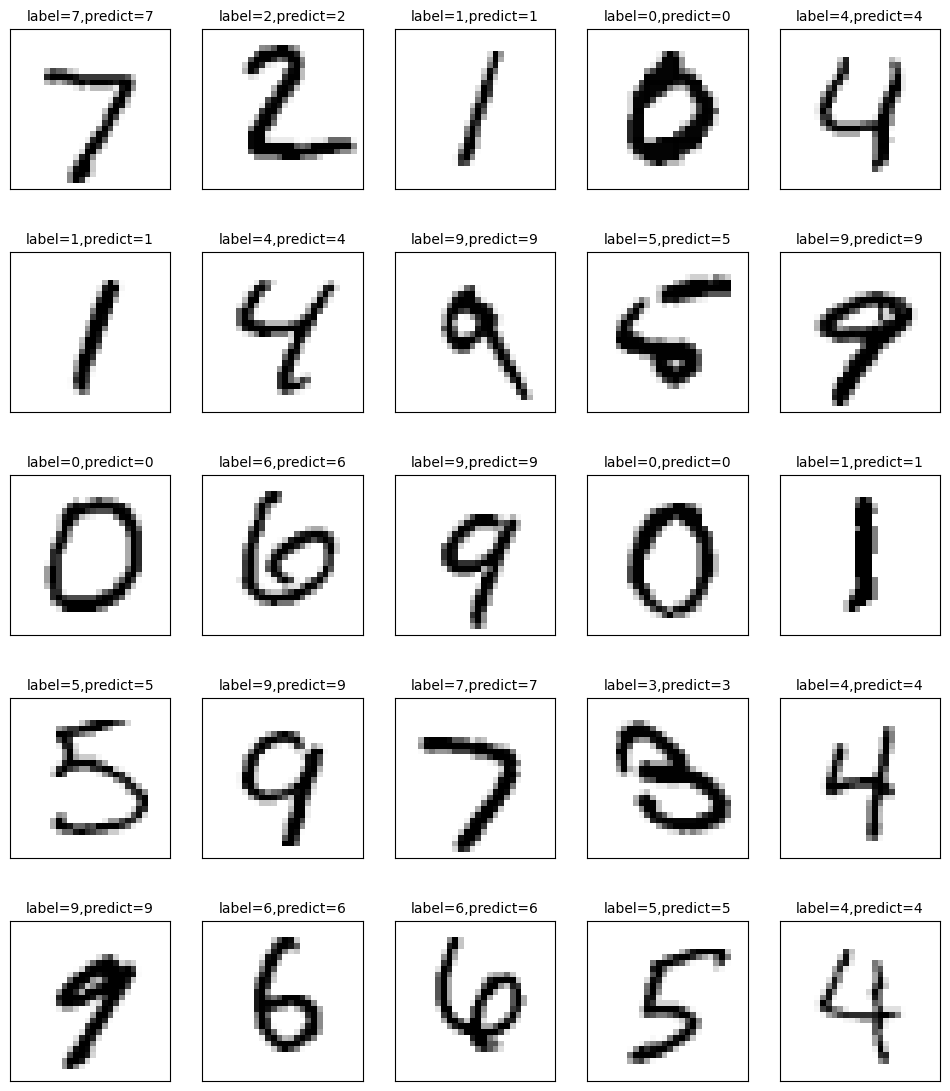

In [8]:
import numpy as np


predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

i = 0  # start from 0
j = 25 # end at 25

(_, _), (x_test_image, y_test_label) = mnist.load_data()
plot_images_labels_prediction(x_test_image,y_test_label,classes_x,i,j)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


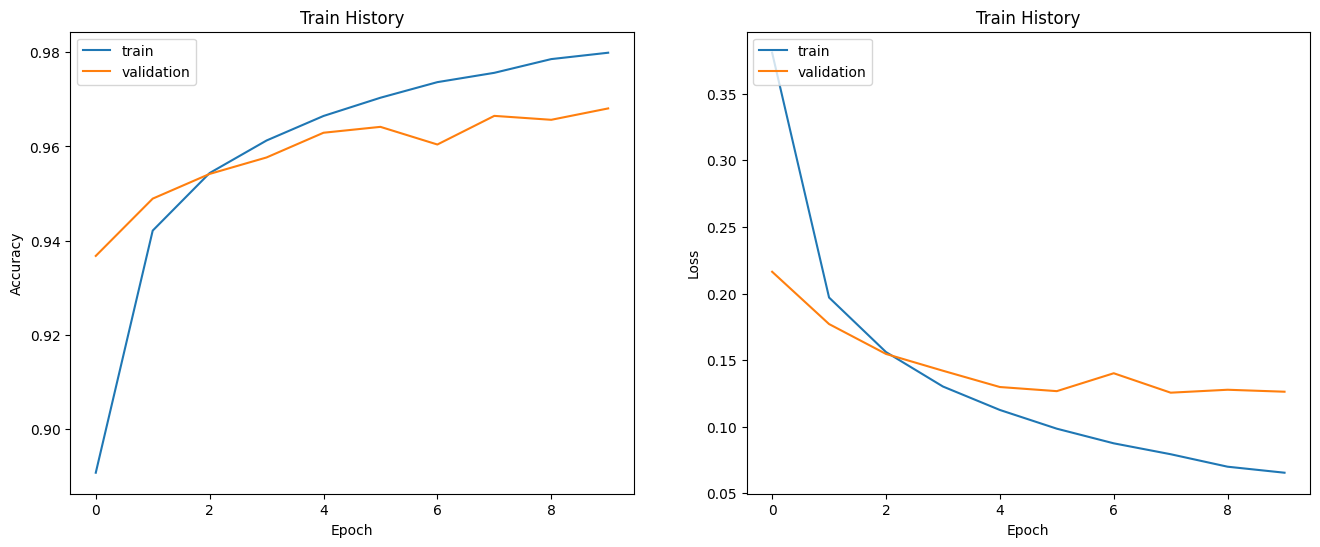

In [9]:
#show train history
show_train_history(history)

In [10]:
import pandas as pd

# create confusion matrix
pd.crosstab(y_test_label, classes_x, rownames=['label'],colnames=['predict'])


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,964,0,2,0,1,4,3,1,4,1
1,0,1117,3,4,0,1,3,1,6,0
2,4,0,1000,5,4,0,5,8,6,0
3,0,1,7,981,0,10,0,5,4,2
4,0,1,5,0,961,0,4,4,0,7
5,4,0,1,14,1,847,9,4,8,4
6,6,3,3,0,3,6,935,0,2,0
7,2,7,11,7,3,0,0,986,2,10
8,3,0,9,7,4,9,6,4,930,2


: 